<a href="https://colab.research.google.com/github/Damilare125/EDA/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5 (Week 5)

>**Note**: Late submissions are ***`penalized`***.

## Name: Damilare Sadiq

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [56]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import typing as tp

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


### Download the data [here](https://drive.google.com/file/d/1BhBejDklCoqsqqAcvycA4n7AIpeRnych/view?usp=share_link)

### Problem Statement

**Customer Personality Analysis** is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Target
Need to perform **clustering** to summarize customer segments.

### Attributes

```
Attributes

People
------
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
--------
MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years

Promotion
---------
NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
-----
NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month
```

## Qs 1
* a) Find the average of all the total amount spent on products. Call this variable `Avg_amount`. 
* b) Convert the `Avg_amount` to deciles (0,1,2,...,9) by creating a new variable, `Avg_amount(weights)` such that the higher the Avg_score, the higher the weight.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)
```

In [2]:
# 1a Enter your solution here
# Viewing the data
fp = "marketing_campaign.csv"
df = pd.read_csv(fp, sep="\t")
# Printing the shape of the data.
print(f"Shape of data: {df.shape}\n")
# Making a copy of the data
df_1 = df.copy()
df_1.head()

Shape of data: (2240, 29)



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
# Getting the total amount spent by the customers
data = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df_1["Total_amount"] = df_1[data].sum(axis=1)

In [8]:
# Getting the average of the total amount spents by the customers
data = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df_1["Avg_amount"] = df_1[data].mean(axis=1)

In [10]:
# 1b Enter your solution here
# Converting the average total spents by customers to deciles by creating a new variable.
df_1['Avg_amount(weights)'] = pd.qcut(df_1['Avg_amount'], 9,
                            labels = False, duplicates="drop")

In [19]:
# Validating result.
df_1[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].head().sample(n=5, random_state=2)

,Total_amount,Avg_amount,Avg_amount(weights)
2,776,129.333333,5
4,422,70.333333,4
1,27,4.500000,0
3,53,8.833333,1
0,1617,269.500000,8


## Qs 2. 
* a) Calculate the percentage of the customer's Income spent on purchasing products.
    
    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Income", "Total_amount", "Percentage_income"]].sample(n=5, random_state=2)
```

* b) Create a pie chart showing the total amount spent by the customers grouped by their `Marital_status`
    Note: Any customer that is not ***single***, ***together***, ***married*** or ***divorced*** should be considered as **others**.

In [52]:
# 2a Enter your solution here
# Calculating the percentage of customer's income spent on purchasing products.
df_1['Percentage_income'] = (df_1["Total_amount"] / 
                  df_1["Income"].sum()) * 100

In [54]:
# Validating result.
df_1[["Income", "Total_amount", "Percentage_income"]].sample(n=5, random_state=2)

,Income,Total_amount,Percentage_income
2053,36927.0,71,0.000061
2019,30261.0,22,0.000019
1891,88420.0,2069,0.001787
335,62204.0,946,0.000817
1600,53843.0,562,0.000485


In [21]:
# Getting the marital status uniques.
df_1["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

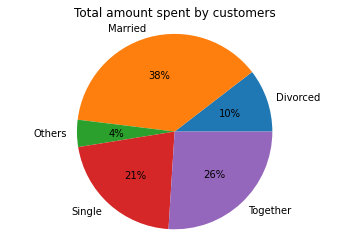

In [57]:
# 2b Enter your solution here
D = df_1.groupby(["Marital_Status"]).sum()
# Reseting index.
D = D.reset_index()
# Grouping the marital status variable.
D.loc[~D["Marital_Status"].isin(["Single", "Together", "Married", "Divorced"]), "Marital_Status"] = "Others"
D = D.groupby(["Marital_Status"]).sum()
# Plotting the pie chart.
plt.pie(D["Total_amount"], labels=D.index, autopct='%1.0f%%')
plt.title("Total amount spent by customers")
plt.axis("equal")
plt.show()


## Qs 3.  
* a) Create a new variable called `Recency(weights)` which is obtained by dividing the `Recency` variable into quintiles (0,1,2,3,4) such that customers lower Recency values have higher weights. i.e the smaller the recency value, the greater the `Recency(weights)`.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Recency", "Recency(weights)"]].sample(n=5, random_state=2)
```

* b) What is the percentage of customers that accepted at least an offer after the end of the promotion campaign?

In [50]:
# 3a Enter your solution here
# Creating a new variable by dividing the Recency variable into quintiles.
df_1["Recency(weights)"] = pd.qcut(df_1['Recency'], 4,
                               labels = False)

In [25]:
# Validating result.
df_1[["Recency", "Recency(weights)"]].sample(n=5, random_state=2)

,Recency,Recency(weights)
2053,46,1
2019,75,3
1891,87,3
335,38,1
1600,64,2


In [29]:
# 3b Enter your solution here
# Calculating the percentage of the customers that accept at least an offer.
Accepted_count = df_1['Response'].sum()
Total_customers = df_1.shape[0]
percentage_rate = (Accepted_count / Total_customers) * 100
print(f"The percentage of the customers that accepted at least an offer is {percentage_rate:.1f}%")

The percentage of the customers that accepted at least an offer is 14.9%


## Qs 4.  
* a) Calculate the frequency of the purchases. (Do this by finding the total number of purchases made by every customer)
* b) Create a new variable, `Frequency(weights)` by converting the result from the previous question to quartiles (0,1,2,3) such that the higher the `Frequency`, the higher the weight.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Frequency", "Frequency(weights)"]].sample(n=5, random_state=2)
```

In [34]:
# 4a Enter your solution here
# Finding the total number of purchases made by the customers.
data_2 = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
df_1["Total_purchase"] = df_1[data_2].sum(axis=1)
# Calculating the frequency of the purchases.
Frequency_purchase = df_1.groupby('Total_purchase').size().reset_index(name='Frequency')

In [39]:
# 4b Enter your solution here
# Creating a new variable by converting the frequency of the purchases to quartiles (0,1,2,3).
df_1["Frequency(weights)"]  = pd.qcut(df_1['Frequency'], 4,
                               labels = [0,1,2,3])

In [43]:
# Validating result.
df_1[["Frequency", "Frequency(weights)"]].sample(n=5, random_state=2)

,Frequency,Frequency(weights)
2053,8,0
2019,4,0
1891,20,2
335,22,3
1600,20,2


## Qs 5.  
* a) Calculate the `Customer Personality Analysis` using **RFM** (Recency Frequency Monetary) value using the formula:
`Recency(weights)` + `Frequency(weights)` + `Avg_amount(weights)`. 
* b) Create a new variable called `Customer_value` by segmenting the customers using the RFM value. The RFM value should be converted into tercile (3 groups). Customer_value should have the following labels: `high_value`, `medium_value` and `low_value` which represents the binned RFM values.

    * **COMPULSORY**: Validate your resulting by running:
```python
df[["Recency(weights)", "Frequency(weights)", "Avg_amount(weights)", "RFM", "Customer_value"]].sample(n=10, random_state=2)
```

In [44]:
# 5a Enter your solution here
# Calculating the customers Personality Analysis using variables.
data_3 = ["Recency(weights)", "Frequency(weights)", "Avg_amount(weights)"]
df_1["RFM"] = df_1[data_3].sum(axis=1)

In [46]:
# 5b Enter your solution here
# Creating a new variable by segmenting the customers using the RFM value.
df_1["Customer_value"] = pd.cut(df_1["RFM"], bins=3, labels=["low_value", "medium_value", "high_value"])

In [48]:
# Validating result.
df_1[["Recency(weights)", "Frequency(weights)", "Avg_amount(weights)", "RFM", "Customer_value"]].sample(n=10, random_state=2)

,Recency(weights),Frequency(weights),Avg_amount(weights),RFM,Customer_value
2053,1,0,2,3,low_value
2019,3,0,0,3,low_value
1891,3,2,8,13,high_value
335,1,3,6,10,high_value
1600,2,2,5,9,medium_value
1459,2,2,5,9,medium_value
2161,2,1,4,7,medium_value
1026,2,0,2,4,low_value
68,0,2,5,7,medium_value
2088,0,0,1,1,low_value
